In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [9]:
from ivim_tensor import IvimTensorModel, IvimTensorFit

In [3]:
from dipy.core.gradients import gradient_table

In [4]:
gtab = gradient_table('./data/DWI_IVIM6.bval', './data/DWI_IVIM6.bvec', b0_threshold=0)

In [5]:
img = nib.load('./data/DWI_IVIM6.nii')

In [6]:
data = img.get_fdata()

In [7]:
b0 = np.mean(data[..., gtab.b0s_mask], -1)

In [8]:
from dipy.segment.mask import median_otsu
b0_mask, mask = median_otsu(b0, median_radius=2, numpass=1)

In [10]:
itm = IvimTensorModel(gtab)

/srv/conda/envs/notebook/lib/python3.7/site-packages/dipy/reconst/ivim.py:151: UserWarning: Bounds for this fit have been set from experiments and literature survey. To change the bounds, please input your bounds in model definition...
  warnings.warn(bounds_warning, UserWarning)


In [13]:
model_params = np.load('model_params.npy')

In [14]:
itf = IvimTensorFit(itm, model_params)

In [18]:
pf_md = np.zeros(mask.shape)
pf_md[mask] = itf.perfusion_fit.md

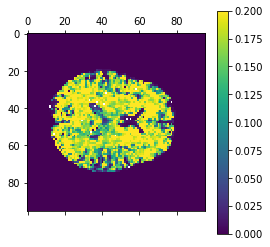

In [21]:
plt.matshow(pf_md[:, :, 8])
plt.colorbar()